<a href="https://colab.research.google.com/github/jaitrasaketh/IIIT-Hyderabad-AI-ML-Program/blob/main/AIML_III_Module_2_Lab2_Principal_Components_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Lab 2 Principal Component Analysis



> 11th July, 2024.



### Step By Step Computation Of PCA
1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set

6. 2D and 3D visualizations of our PCA

### Exercise Questions Solutions

1. Question 1
2. Question 2

##Step by Step Computation of PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [12]:
breast_data=load_breast_cancer().data
breast_labels=np.reshape(load_breast_cancer().target,(569,1))

final_breast_data=np.concatenate([breast_data,breast_labels],axis=1)

In [17]:
breast_dataset=pd.DataFrame(final_breast_data)
features=load_breast_cancer().feature_names
features


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [19]:
features_label=np.append(features,'label')

breast_dataset.columns=features_label
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [23]:
X=breast_dataset.iloc[:,:30].values  ## gets only the features . .value function helps to store in numpy array
y=breast_dataset.iloc[:,30].values     ##gets only labels and .value helps to store them in numpy array

####Step 1 : normalisation/standardization of the data

In [29]:
from sklearn.preprocessing import StandardScaler

X_std=StandardScaler().fit_transform(X)

print(np.std(X_std))
print(np.mean(X_std)) ## doubt, why is mean not 0.

1.0
-6.118909323768877e-16


In [30]:
X_std_df=pd.DataFrame(X_std)
X_std_df.columns=features

X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


####Computing Covariance Matrix

In [36]:
mean_vec = np.mean(X_std,axis=0) ## Computing feature wise means
mean_vec_df=pd.DataFrame(mean_vec)
mean_vec_df

,0
0,-3.162867e-15
1,-6.530609e-15
2,-7.078891e-16
3,-8.799835e-16
4,6.132177e-15
5,-1.120369e-15
6,-4.421380e-16
7,9.732500e-16
8,-1.971670e-15
9,-1.453631e-15


In [48]:
cov_mat=1/(X_std.shape[0]-1)*np.dot((X_std-mean_vec).T,(X_std-mean_vec))
print(cov_mat[:5,:5])
cov_mat.shape

[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


(30, 30)

In [51]:
## direct approach.

cov_mat_numpy=np.cov(X_std.T) ## Takes input as features in the rows
print(cov_mat_numpy[0:5, 0:5])

[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


####Calculating Eigen values and Eigen vectors

In [53]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat) ## calculate the eigen vectors of the covariance matrix

####Performing the PCA

In [68]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True) ## reverse=True emas descending order


## calculating explained variance from the eigen values
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in eig_vals]

var_exp2=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp2)
print(var_exp)

[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.10386467483387138, 0.0999096463700257, 0.09146467510543423, 0.08113612588991044, 0.06018335666716721, 0.05160423791652017, 0.02725879954774855, 0.0230015462505957, 0.005297792903809204, 0.0024960103246895395, 0.00044348274273613787]
[44.27202560752635, 18.971182044033085, 9.393163257431393, 6.602134915470151, 5.495768492346255, 4.0245220398833546, 2.250733712982508, 1.5887238000213262, 1.3896493745591088, 1.1689781894131472, 0.9797189875980173, 0.870537900737884, 0.8045249871967302, 0.5233657454926353, 0.31378321676273985, 0.26620933651523176, 0.19799679253242683, 0.17539594502263636, 0.1649253059225157, 0.00044

In [66]:
cum_var=np.cumsum(var_exp)
cum_var.shape

(30,)

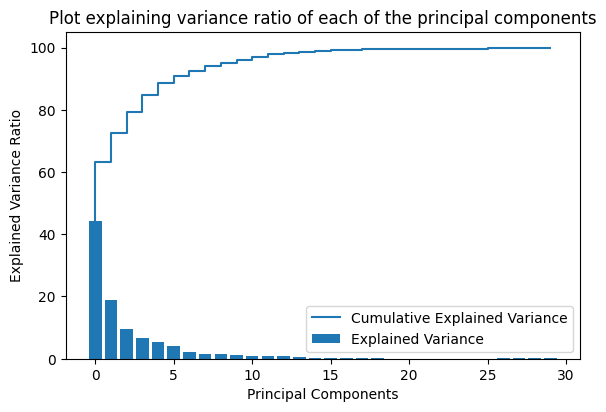

In [79]:
plt.figure(figsize=(6,4))
plt.bar(range(30),var_exp,label="Explained Variance")
plt.step(range(30),cum_var,label="Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.tight_layout()
plt.title("Plot explaining variance ratio of each of the principal components")
plt.show()

####Reducing the Dimension of the dataset

In [80]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

##selecting only first 3, reducing to 3 dimesniosn as it guarenatees close to 75%variance

Y = X_std.dot(matrix_w)

print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [81]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
Y_sklearn=pca.fit_transform(X_std)
Y_sklearn

array([[ 9.19283685,  1.94858293, -1.12316033],
       [ 2.38780182, -3.76817185, -0.52928625],
       [ 5.73389626, -1.07517375, -0.55175005],
       ...,
       [ 1.25617927, -1.90229668,  0.562729  ],
       [10.37479405,  1.67201016, -1.87703156],
       [-5.47524328, -0.67063693,  1.49044956]])

In [82]:
final_df=pd.DataFrame(columns=['PC1','PC2','PC3','Label'])

In [98]:
for i in range(len(Y)):
  dicti=dict() #The values of the first three principal components for the i-th row of Y are stored in the dictionary under keys "PC1", "PC2", and "PC3".
  dicti['PC1']=Y[i,0]
  dicti['PC2']=Y[i,1]
  dicti['PC3']=Y[i,2]
  if((breast_labels[i])==0):
    dicti['Label']="Benign"
  else:
    dicti['Label']="Malignant"
  final_df=pd.concat([final_df,pd.DataFrame([dicti])],ignore_index="True") ##axes=0 so row wise append


final_df.head()


,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


### 2D and 3D visualizations of our PCA

In [101]:
import plotly.express as px
import plotly.graph_objects as go

for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})


In [103]:
fig.show()

In [106]:

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8))


In [107]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

##Exercise




> How many components do you need to retain 90% of the variance in the data?



In [109]:
indices=np.where(cum_var >= 90)

indices

(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 25, 26, 27, 28, 29]),)

In [110]:
min_num_of_componenets_for_90_variance = indices[0][0]+1
min_num_of_componenets_for_90_variance

7

Therefore the number of components required to retain 90% of the variance of the data is 6+1=7 components



> Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.



Image compression is a common application of PCA, where the goal is to reduce the size of image files while preserving as much of the original image quality as possible. This is important for reducing storage requirements and speeding up image processing tasks.

